# De la clase

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from random import *
from sklearn.preprocessing import StandardScaler

In [3]:
pwd

u'/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/codigo'

In [300]:
df=pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/regLin.csv")

In [301]:
df.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [302]:
X_train, X_test, y_train, y_test =train_test_split(df[['X']],df[['y']],test_size=0.25)

In [303]:
len(df)

1029

In [304]:
#X_train

In [305]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

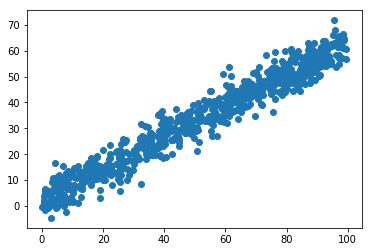

In [306]:
plt.scatter(X_train,y_train)

In [312]:
modelo=LinearRegression(normalize=True)

In [313]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [310]:
modelo.intercept_

array([2.31424098])

In [311]:
modelo.coef_

array([[0.60827877]])

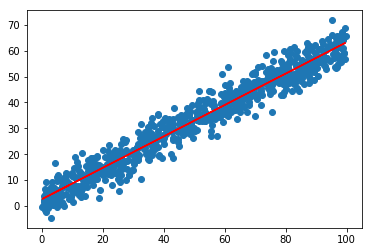

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_test,modelo.predict(X_test),c='r')

In [56]:
w0=modelo.intercept_
w0

array([2.66240983])

In [27]:
w1=modelo.coef_[0]

In [28]:
w1

array([0.60611575])

In [29]:
w0+w1*7

array([6.90522005])

In [30]:
modelo.predict(7)

array([[6.90522005]])

In [33]:
np.mean((y_test-modelo.predict(X_test))**2)

17.468517915129624

In [45]:
def calcError(w0,w1):
    return np.mean((y_train-(w0+w1*X_train))**2)

In [68]:
randint(-10,10)

-8

In [138]:
wprima=np.arange(-5,10,.5)

In [139]:
y=[calcError(wprima[i],w1) for i in range(len(wprima))]

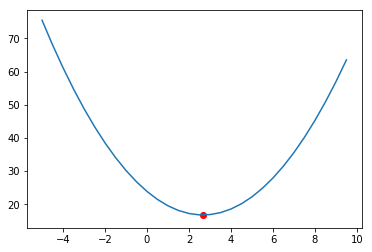

In [143]:
plt.plot(wprima,y)
plt.scatter(w0,calcError(w0,w1),c='r')

# Otros datos

In [148]:
df=pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/regLin3.csv")

In [149]:
X_train, X_test, y_train, y_test =train_test_split(df[['X']],df[['y']],test_size=0.25)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

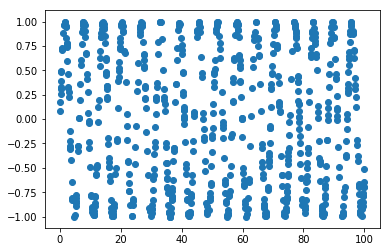

In [151]:
plt.scatter(X_train,y_train)

In [152]:
modelo=LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

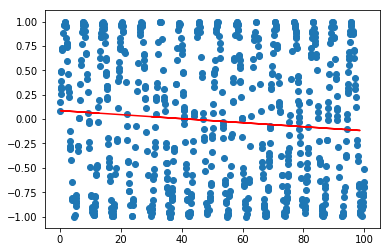

In [153]:
plt.scatter(X_train,y_train)
plt.plot(X_test,modelo.predict(X_test),c='r')

In [155]:
X_train=np.sin(X_train)
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

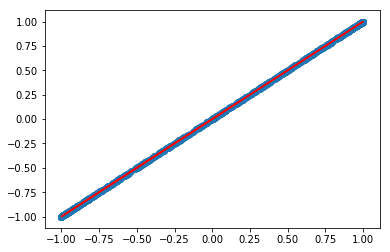

In [159]:
X_test=np.sin(X_test)
plt.scatter(X_train,y_train)
plt.plot(X_test,modelo.predict(X_test),c='r')

# Regresión Iterativa (SGD)

In [320]:
df=pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/regLin.csv")

In [321]:
df['X0']=1


In [322]:
X_train, X_test, y_train, y_test =train_test_split(df[['X0','X']],df[['y']],test_size=0.25)


In [323]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train=scalerX.transform(X_train)

scalerY = StandardScaler()
scalerY.fit(y_train)
y_train=scalerY.transform(y_train)

In [324]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [325]:
X_train[:,0]=1.0

In [326]:
X_train

array([[ 1.        , -0.50255863],
       [ 1.        ,  0.59582975],
       [ 1.        ,  1.55262405],
       ...,
       [ 1.        ,  0.27614181],
       [ 1.        , -1.42027213],
       [ 1.        , -0.9605744 ]])

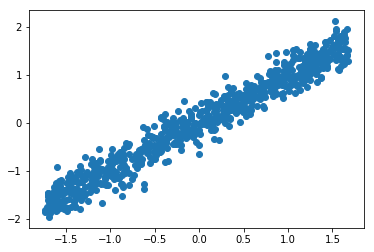

In [327]:
plt.scatter(X_train[:,1],y_train)

In [328]:
def salida(x,w):
    res=0
    for i in range(len(w)):
        res+=x[i]*w[i]
    return res
        

In [329]:
salida([1,2],[1,1])

3

In [342]:
def SGD(X,Y,w,eta=0.001):
    for x,y in zip(X,Y):
        error=y-salida(x,w)
        #print(error)
        for i in range(len(w)):
            w[i]=w[i]+eta*error*x[i]
    return w

In [343]:
w=[random() for i in range(len(X_train[0]))]
w

[0.37468130916276765, 0.5786955922166888]

In [344]:
for i in range(100):
    w=SGD(X_train,y_train,w)

In [345]:
w

[array([-0.00085434]), array([0.97651022])]

In [346]:
X_test=scalerX.transform(X_test)
X_test[:,0]=1.0

In [315]:
y_test=scalerY.transform(y_test)


In [299]:
calcError(w[0],w[1])

0.976258046377144

# Perceptron

In [353]:
df=pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/andSVM.csv")

In [372]:
df['X0']=1

In [373]:
X_train, X_test, y_train, y_test =train_test_split(df[['X0','X1','X2']],df[['y']],test_size=0.25)


In [374]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [375]:
X_train[:,0]=1.0

In [377]:
colores=[]
for y in y_train:
    if y==1:
        colores+=['r']
    else:
        colores+=['b']

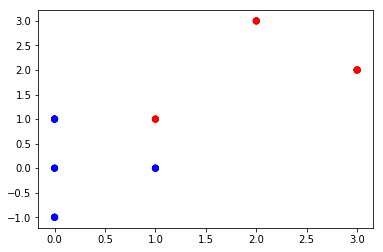

In [378]:
plt.scatter(X_train[:,1],X_train[:,2],c=colores)

In [381]:
def salida(x,w):
    res=0
    for i in range(len(w)):
        res+=x[i]*w[i]
    if res>0:
        return 1
    else:
        return 0
        

In [382]:
def SGD(X,Y,w,eta=0.001):
    for x,y in zip(X,Y):
        error=y-salida(x,w)
        #print(error)
        for i in range(len(w)):
            w[i]=w[i]+eta*error*x[i]
    return w

In [424]:
w=[random() for i in range(len(X_train[0]))]
for i in range(1000):
    w=SGD(X_train,y_train,w)

In [425]:
w

[array([-0.09975896]), array([0.0980003]), array([0.00191572])]

In [429]:
res=[]
for i in range(len(X_test)): 
    res+=[salida(X_test[i],w)]

In [430]:
sum=0
for es,creo_que_es in zip(y_test,res):
    if es==creo_que_es:
        sum+=1.0

In [432]:
100*sum/len(y_test)

100.0

In [405]:
w

[array([0.89575359]), array([0.22159473]), array([0.11815408])]